In [11]:
# ==============================
# IMPORTAMOS LIBRERÍAS NECESARIAS
# ==============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [12]:
# ==============================
# CARGAR DATOS CSV Cash  y FeeS
# ==============================
df_cash = pd.read_csv('extract - cash request - data analyst.csv')
df_fees = pd.read_csv('extract - fees - data analyst - .csv')

In [13]:
# ===========================================================
# CHECK GLOBAL CSV Cash para evaluar el tipo de dato y fecha
# ===========================================================
df_cash.info()
df_cash.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [14]:
# ===========================================================
# CHECK GLOBAL CSV Fees para evaluar el tipo de dato y fecha
# ===========================================================
df_fees.info()
df_fees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [15]:
# ===========================================================================================================
# LIMPIEZA DE DATOS: Convertir created_at a datetime y eliminar filas con fechas inválidas (si es necesario)
# ===========================================================================================================

# Convertir created_at a datetime, ignorando errores
    # errors='coerce': Si la fecha es válida, se convierte correctamente.
    # Si es inválida (e.g., 'abc' o vacío), se convierte en NaT (Not a Time, equivalente a NaN para fechas).
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'], errors='coerce')

df_fees['created_at'] = pd.to_datetime(df_fees['created_at'], errors='coerce')
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], errors='coerce')

# Eliminar filas inválidas de "created_at"
    # subset=['created_at']: Limita la eliminación solo a la columna 'created_at'
        # Solo borra filas donde 'created_at' es NaN/NaT
        # Otras columnas (e.g., 'user_id', 'amount') pueden tener NaNs, pero se conservan (no se eliminan por ellas).
    # dropna(): Elimina filas con valores nulos, Fechas invalidas.
        # Resultado: El DataFrame queda con solo filas que tienen fechas válidas en 'created_at', manteniendo la integridad para el análisis.
            # df_cash = df_cash.dropna(subset=['created_at'])
            # df_fees = df_fees.dropna(subset=['created_at'])
        # NOTA: en el caso de este análisis no ha hecho falta aplicar dropna() ya que no hay fechas invalidas ni en CSV Cash ni en CSV Fees. 



MÉTRICA 1:  
> FRECUENCIA DE USO DEL SERVICIO (SOLICITUDES DE CASH POR USUARIO ACTIVO)  
> BONUS: CÁLCULO DE RETENCIÓN  
> GRÁFICA COMBINADA

C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3856854994.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3856854994.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cash['period'] = df_cash['created_at'].dt.to_period('M')


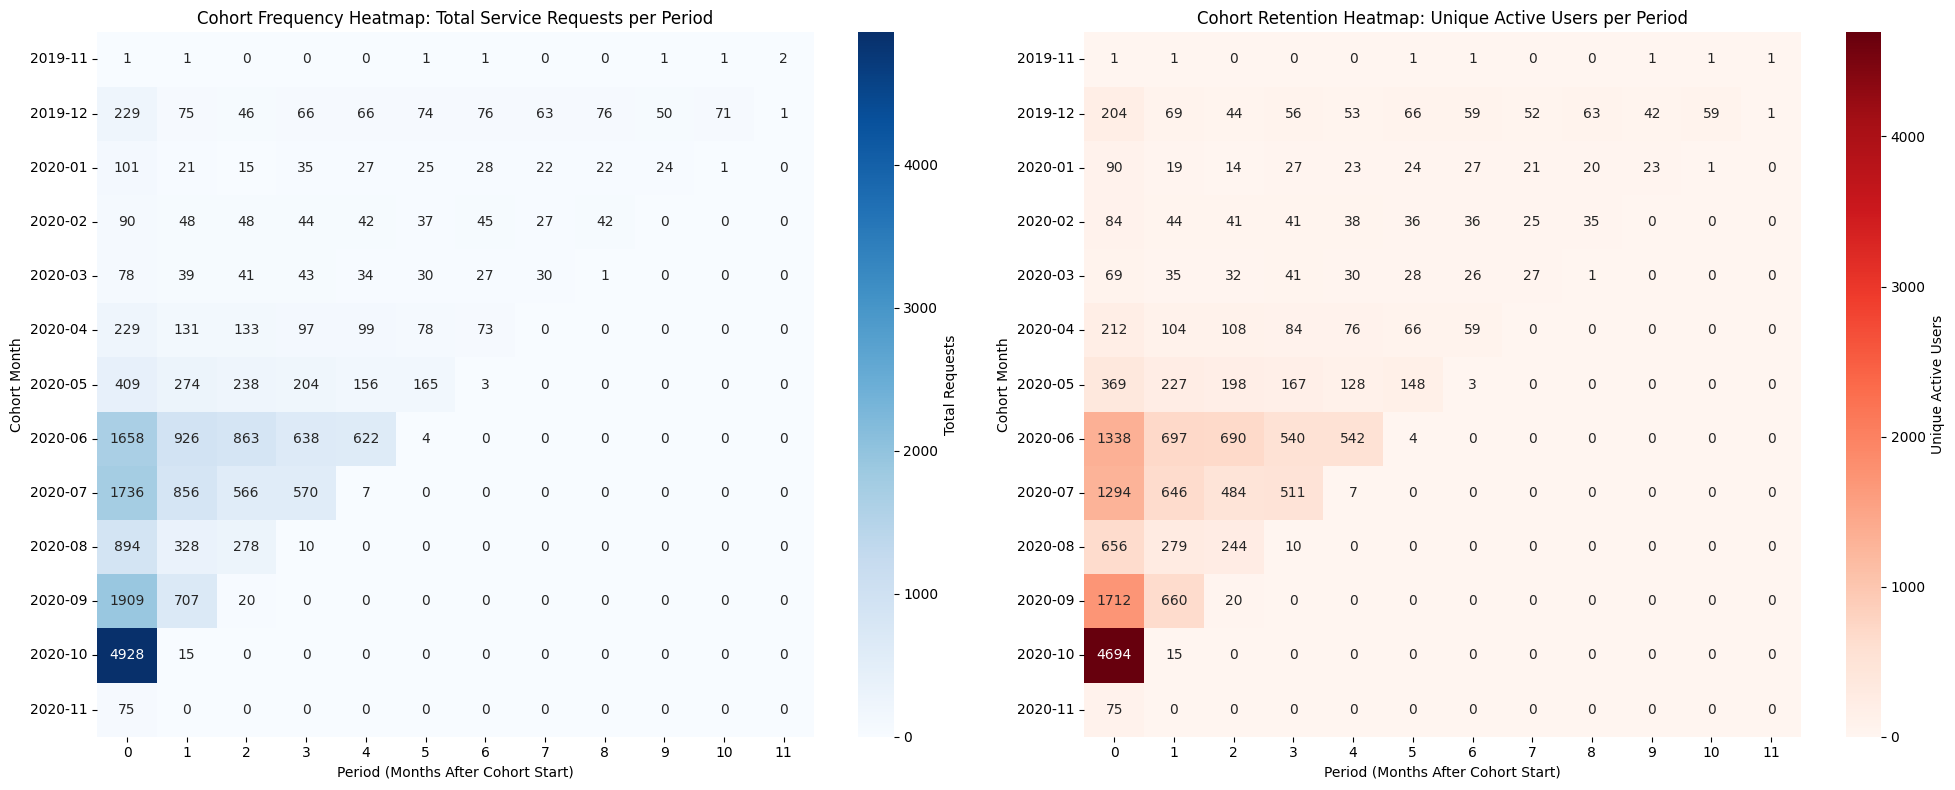


Cohort Sizes (Frecuencia de Uso):
cohort_month  period_number  total_requests  n_users  avg_frequency  cohort_size
     2019-11              0               1        1       1.000000            1
     2019-11              1               1        1       1.000000            1
     2019-11              5               1        1       1.000000            1
     2019-11              6               1        1       1.000000            1
     2019-11              9               1        1       1.000000            1
     2019-11             10               1        1       1.000000            1
     2019-11             11               2        1       2.000000            1
     2019-12              0             229      204       1.122549          204
     2019-12              1              75       69       1.086957          204
     2019-12              2              46       44       1.045455          204
     2019-12              3              66       56       1.178571       

In [16]:
# ==================================================================================
# MÉTRICA 1: FRECUENCIA DE USO DEL SERVICIO (SOLICITUDES DE CASH POR USUARIO ACTIVO)
# ==================================================================================
# Esta métrica calcula el promedio de solicitudes de cash por usuario activo en cada cohorte y período.
# Se basa en: solicitudes de df_cash, agrupadas por cohorte/período, normalizadas por usuarios activos.
# Fórmula final: total_requests / n_users (promedio por usuario activo), con total_requests como conteo de solicitudes.

# Paso 1: Encontrar la primera solicitud por usuario para definir cohortes
# - Groupby por 'user_id' y toma el mínimo 'created_at' para identificar la fecha de entrada al cohorte.
# - Esto crea un DataFrame con una fila por usuario, conteniendo su fecha de primera solicitud.
# - .reset_index() convierte el Series resultante en DataFrame para merges posteriores.
first_requests = df_cash.groupby('user_id')['created_at'].min().reset_index()

# Paso 2: Convertir la fecha de primera solicitud a período mensual para etiquetar la cohorte
# - .dt.to_period('M') transforma la fecha a formato de período mensual (e.g., '2020-01-15' -> '2020-01').
# - Esto permite agrupaciones temporales fáciles por mes de cohorte.
first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')

# Paso 3: Unir cohorte a cada solicitud de cash
# - Merge left: Toma todas las solicitudes de df_cash y une con first_requests para agregar 'cohort_month' basado en 'user_id'.
# - how='left' asegura que todas las solicitudes se mantengan, incluso si no tienen cohorte (se limpiarán después).
df_cash = df_cash.merge(first_requests[['user_id', 'cohort_month']], on='user_id', how='left')

# Paso 4: Eliminar solicitudes sin cohorte asignada
# - dropna en 'cohort_month': Elimina filas donde la unión falló (e.g., user_id no encontrado en first_requests, datos huérfanos).
# - Esto asegura que solo se analicen solicitudes con cohorte válida para cálculos posteriores.
df_cash = df_cash.dropna(subset=['cohort_month'])

# Paso 5: Calcular columna de período para cada solicitud
# - .dt.to_period('M') convierte 'created_at' a período mensual (e.g., mes de la solicitud).
# - Esto se usa para determinar cuántos meses han pasado desde el cohorte.
df_cash['period'] = df_cash['created_at'].dt.to_period('M')

# Paso 6: Calcular número de período (meses desde cohorte)
# - Resta el período de la solicitud menos el cohorte para obtener el número de meses transcurridos (e.g., 0 para el mes inicial).
# - .apply(lambda x: x.n) extrae el entero del Period (diferencia en meses); astype('Int64') permite valores nulos.
df_cash['period_number'] = (df_cash['period'] - df_cash['cohort_month']).apply(lambda x: x.n).astype('Int64')

# Paso 7: Agrupar por cohorte y período para calcular total de solicitudes y usuarios activos
# - Groupby por 'cohort_month' y 'period_number': Agrupa todas las solicitudes por combinación de cohorte y tiempo relativo.
# - .agg: 'id': 'count' cuenta el total de solicitudes (cada fila es una solicitud); 'user_id': 'nunique' cuenta usuarios únicos activos en ese período.
frequency_data = df_cash.groupby(['cohort_month', 'period_number']).agg({
    'id': 'count',  # total solicitudes
    'user_id': 'nunique'  # usuarios activos
})

# Paso 8: Renombrar columnas para claridad en el análisis
# - Renombra 'id' (conteo) a 'total_requests' y 'user_id' (nunique) a 'n_users'.
# - Esto facilita el uso en fórmulas y visualizaciones posteriores.
frequency_data = frequency_data.rename(columns={'id': 'total_requests', 'user_id': 'n_users'})

# Paso 9: Calcular frecuencia promedio (por usuario activo)
# - np.where: Si n_users > 0, divide total_requests / n_users; sino 0 (evita división por cero en períodos vacíos).
# - Esto da el promedio de solicitudes por usuario activo en ese período (e.g., 1.12 significa ~1.12 solicitudes por usuario vivo).
frequency_data['avg_frequency'] = np.where(frequency_data['n_users'] > 0, 
                                           frequency_data['total_requests'] / frequency_data['n_users'], 
                                           0)

# Paso 10: Unir tamaño de cada cohorte
# - cohort_sizes: Tamaño inicial de la cohorte (usuarios únicos en period_number == 0).
# - .join: Une por 'cohort_month' (índice de cohort_sizes) para agregar 'cohort_size' como referencia fija por cohorte.
# - .reset_index() convierte el MultiIndex de vuelta a columnas para manipulación fácil.
cohort_sizes = df_cash[df_cash['period_number'] == 0].groupby('cohort_month')['user_id'].nunique().to_frame('cohort_size')
frequency_data = frequency_data.join(cohort_sizes, on='cohort_month').reset_index()

# Paso 11: Pivot para heatmap: total de solicitudes (cambio clave para visualización)
# - .pivot: Reestructura datos con 'cohort_month' en filas, 'period_number' en columnas, y 'total_requests' como valores.
# - .fillna(0): Rellena huecos (períodos sin datos) con 0 para heatmaps completos sin gaps.
pivot_frequency = frequency_data.pivot(index='cohort_month', columns='period_number', values='total_requests').fillna(0)

# ===========================================================================
# BONUS: CÁLCULO DE RETENCIÓN (Usuarios Únicos Activos por Cohorte y Período)
# ===========================================================================
# Calcula usuarios activos por cohorte/período y tasa de retención (% vs. tamaño inicial).
# Fórmula: n_users directo; retention_rate = (n_users / cohort_size) * 100.

# Paso 1: Contar usuarios únicos activos por cohorte y período
# Groupby por 'cohort_month' y 'period_number'; nunique('user_id') para activos.
# reset_index(name='n_users') crea DataFrame con conteos.
retention_data = df_cash.groupby(['cohort_month', 'period_number'])['user_id'].nunique().reset_index(name='n_users')

# Paso 2: Calcular tamaño de cohorte (usuarios en period_number == 0)
# Filtra período 0; renombra 'n_users' a 'cohort_size' para tamaño inicial.
cohort_sizes = retention_data[retention_data['period_number'] == 0][['cohort_month', 'n_users']].rename(columns={'n_users': 'cohort_size'})

# Paso 3: Unir tamaño de cohorte
# Merge left por 'cohort_month'; propaga cohort_size a todos los períodos.
retention_data = retention_data.merge(cohort_sizes, on='cohort_month', how='left')

# Paso 4: Calcular tasa de retención (%)
# Divide n_users / cohort_size * 100; mide % de cohorte original activa.
retention_data['retention_rate'] = (retention_data['n_users'] / retention_data['cohort_size']) * 100

# Paso 5: Pivot para heatmap: usuarios únicos
# Pivot con 'cohort_month' en filas, 'period_number' en columnas, 'n_users' en valores.
# fillna(0) rellena períodos vacíos para visualizaciones completas.
pivot_retention = retention_data.pivot(index='cohort_month', columns='period_number', values='n_users').fillna(0)

# ================================
# GRÁFICOS - DASHBOARD COMBINADO
# ================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap de Frecuencia de uso (total de solicitudes, tonos azules)
sns.heatmap(pivot_frequency, annot=True, fmt='.0f', cmap='Blues', ax=ax1, 
            cbar_kws={'label': 'Total Requests'})
ax1.set_title('Cohort Frequency Heatmap: Total Service Requests per Period')
ax1.set_xlabel('Period (Months After Cohort Start)')
ax1.set_ylabel('Cohort Month')

# Heatmap de Retención (usuarios únicos, tonos rojos)
sns.heatmap(pivot_retention, annot=True, fmt='.0f', cmap='Reds', ax=ax2, 
            cbar_kws={'label': 'Unique Active Users'})
ax2.set_title('Cohort Retention Heatmap: Unique Active Users per Period')
ax2.set_xlabel('Period (Months After Cohort Start)')
ax2.set_ylabel('Cohort Month')

plt.tight_layout()
plt.show()

# Mostrar tamaños de cohortes y datos resumidos (incluye totales y promedios para comparación)

print("\nCohort Sizes (Frecuencia de Uso):")
print(frequency_data.sort_values('cohort_month').to_string(index=False))

print("Cohort Sizes (Retención con usuarios únicos en periodo 0):")
print(cohort_sizes.sort_values('cohort_month').to_string(index=False))

print("\nResumen de Frecuencia de Uso (primeras cohortes, todos los períodos):")
frequency_summary = frequency_data[frequency_data['cohort_month'].isin(sorted(frequency_data['cohort_month'].unique())[:5])][
                        ['cohort_month', 'period_number', 'total_requests', 'avg_frequency']]
print(frequency_summary.to_string(index=False))

print("\nResumen de Retención, Total Solicitudes y Frecuencia Promedio (primeras cohortes, períodos 0-3):")
summary_df = retention_data.merge(frequency_data[['cohort_month', 'period_number', 'total_requests', 'avg_frequency']], 
                                  on=['cohort_month', 'period_number'], how='outer')
display_df = summary_df[summary_df['cohort_month'].isin(sorted(summary_df['cohort_month'].unique())[:5]) & 
                        (summary_df['period_number'] <= 3)][
                            ['cohort_month', 'period_number', 'n_users', 'total_requests', 'avg_frequency']]
print(display_df.to_string(index=False))



In [17]:
# Antes de comenzar la nueva métrica, es necesario recargar y preparar los datos de nuevo de CSV Cash, si no se hace da ERROR
df_cash = pd.read_csv('extract - cash request - data analyst.csv')
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'], errors='coerce')
df_cash = df_cash.dropna(subset=['created_at'])

## MÉTRICA 2:  
> TASA DE INCIDENTES  
> BONUS: RELACIÓN TASA DE INCIDENTES vs REVENUE TOTAL POR COHORTE  
> GRÁFICA COMBINADA

C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3312264240.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3312264240.py:37: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_incidents['period'] = df_incidents['created_at'].dt.to_period('M')
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3312264240.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cr_with_cohort['period'] = df_cr_with_cohort['created_at'].dt.to_period('M')
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\3312264240.py:95: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_revenue_fees['period'] = df_revenue_fees['created_at'].dt.to_period('M')


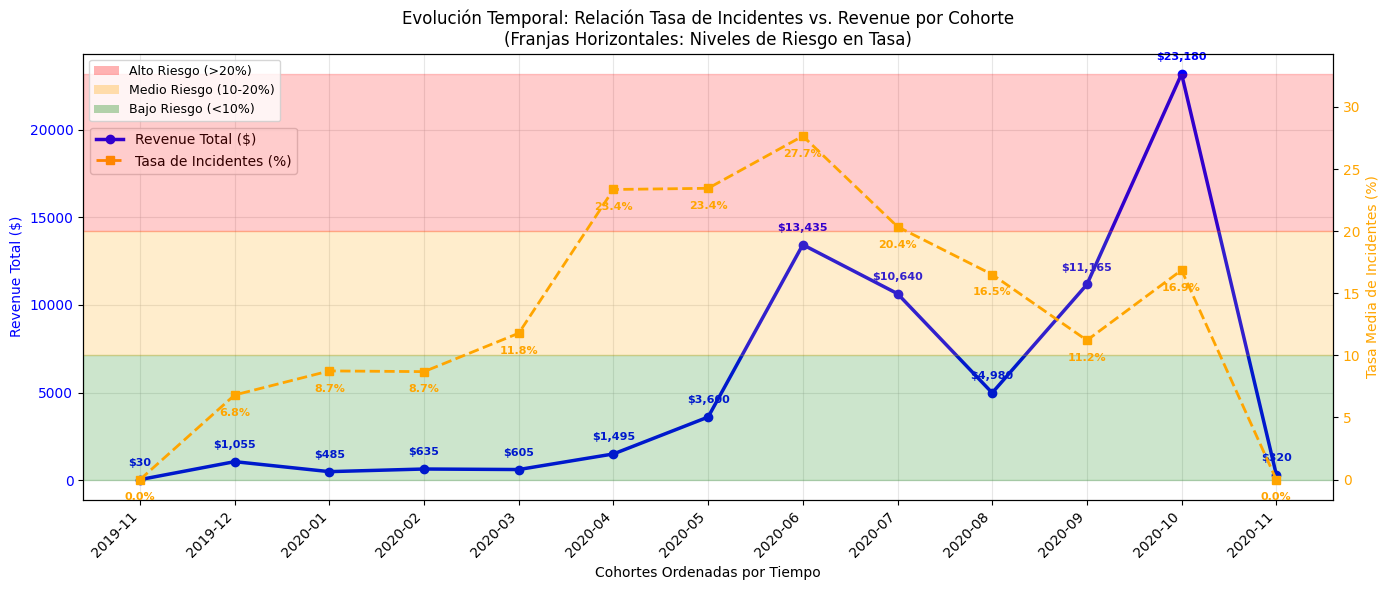

In [18]:
# (Angel VG)
# ==============================
# MÉTRICA 2: TASA DE INCIDENTES
# ==============================
# Esta métrica calcula el porcentaje promedio de incidentes (de fees) por usuario activo en cada cohorte.
# Se basa en: incidentes filtrados de df_fees, enlazados a cohortes de df_cash, y normalizados por usuarios activos por período.
# Fórmula final: (n_incidents / n_users) * 100, promediado por cohorte.

# Paso 1: Calcular la primera solicitud por usuario para definir cohortes (reutilizable para merges posteriores)
# - Groupby por 'user_id' y toma el mínimo 'created_at' para identificar la fecha de entrada al cohorte.
# - Esto crea un DataFrame con una fila por usuario, conteniendo su fecha de primera solicitud.
first_requests = df_cash.groupby('user_id')['created_at'].min().reset_index()
# Convertir la fecha mínima a período mensual (e.g., '2020-01-15' -> '2020-01') para etiquetar la cohorte.
first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')

# Paso 2: Preparar datos de incidentes
# - Filtrar df_fees solo para filas donde 'type' == 'incident' (incidentes de pago, como rechazos o delays).
# - .copy() evita SettingWithCopyWarning al modificar el DataFrame filtrado.
df_incidents = df_fees[df_fees['type'] == 'incident'].copy()

# Paso 3: Enlazar incidentes a solicitudes de cash para obtener user_id
# - Merge left: Toma todos los incidentes y une con df_cash para agregar 'user_id' vía 'cash_request_id' == 'id'.
# - Esto hereda el user_id de la solicitud asociada al incidente.
df_incidents = df_incidents.merge(df_cash[['id', 'user_id']], left_on='cash_request_id', right_on='id', how='left')

# Paso 4: Enlazar incidentes a cohortes
# - Merge left: Une con first_requests para agregar 'cohort_month' basado en 'user_id'.
# - Solo incidentes con user_id válido obtendrán cohorte.
df_incidents = df_incidents.merge(first_requests[['user_id', 'cohort_month']], on='user_id', how='left')

# Paso 5: Limpiar incidentes sin cohorte
# - Eliminar filas donde 'cohort_month' es NaN (usuarios sin cohorte asignada, posiblemente datos huérfanos).
df_incidents = df_incidents.dropna(subset=['cohort_month'])

# Paso 6: Calcular período para incidentes
# - Convertir 'created_at' del incidente a período mensual.
df_incidents['period'] = df_incidents['created_at'].dt.to_period('M')
# - Calcular 'period_number': Meses transcurridos desde el cohorte (e.g., si cohorte=2020-01 y incidente=2020-03, =2).
# - La lambda maneja NaNs: Si x es NaN, asigna np.nan; luego astype('Int64') para nullable integers.
df_incidents['period_number'] = (df_incidents['period'] - df_incidents['cohort_month']).apply(lambda x: x.n if pd.notna(x) else np.nan).astype('Int64')

# Paso 7: Preparar datos de cash requests con cohortes para contar usuarios activos
# - Merge left: Une df_cash con first_requests para agregar 'cohort_month' a cada solicitud.
df_cr_with_cohort = df_cash.merge(first_requests[['user_id', 'cohort_month']], on='user_id', how='left')

# - Limpiar solicitudes sin cohorte (NaN en 'cohort_month').
df_cr_with_cohort = df_cr_with_cohort.dropna(subset=['cohort_month'])

# - Calcular período para solicitudes de cash (similar al Paso 6).
df_cr_with_cohort['period'] = df_cr_with_cohort['created_at'].dt.to_period('M')
df_cr_with_cohort['period_number'] = (df_cr_with_cohort['period'] - df_cr_with_cohort['cohort_month']).apply(lambda x: x.n if pd.notna(x) else np.nan).astype('Int64')

# Paso 8: Contar usuarios activos por cohorte y período
# - Groupby por 'cohort_month' y 'period_number', cuenta usuarios únicos ('nunique(user_id)') que hicieron solicitudes en ese período.
# - 'n_users' = usuarios activos (al menos una solicitud en el período).
n_users_per_period = df_cr_with_cohort.groupby(['cohort_month', 'period_number'])['user_id'].nunique().reset_index(name='n_users')

# Paso 9: Contar incidentes por cohorte y período
# - Groupby similar, cuenta incidentes únicos ('count(id_x)', donde 'id_x' es el ID del incidente post-merge).
incidents_per_period = df_incidents.groupby(['cohort_month', 'period_number'])['id_x'].count().reset_index(name='n_incidents')

# Paso 10: Calcular tasa de incidentes por período
# - Merge left: Une conteos de usuarios e incidentes por cohorte/período; incidentes NaN se rellenan con 0.
incident_rate_data = n_users_per_period.merge(incidents_per_period, on=['cohort_month', 'period_number'], how='left').fillna({'n_incidents': 0})
# - Aplicar fórmula: Si n_users > 0, (n_incidents / n_users) * 100; sino 0. Esto da % de incidentes por usuario activo.
incident_rate_data['incident_rate'] = np.where(incident_rate_data['n_users'] > 0, (incident_rate_data['n_incidents'] / incident_rate_data['n_users']) * 100, 0)

# Paso 11: Promediar tasa por cohorte (para análisis agregado, ignorando períodos específicos)
# - Groupby por 'cohort_month', toma media de 'incident_rate' por cohorte.
# - 'tasa_incidentes' = tasa media histórica por cohorte.
avg_incident_rate = incident_rate_data.groupby('cohort_month')['incident_rate'].mean().reset_index(name='tasa_incidentes')

# ================================================================
# BONUS: RELACIÓN TASA DE INCIDENTES vs REVENUE TOTAL POR COHORTE
# ================================================================
# MÉTRICA 3: INGRESOS GENERADOS POR COHORTE
# Esta métrica calcula el revenue total de fees 'accepted' por cohorte (suma histórica).

# Paso 1: Filtrar fees aceptados
# - Solo fees con 'status' == 'accepted' (ingresos válidos).
df_revenue_fees = df_fees[df_fees['status'] == 'accepted'].copy()

# Paso 2: Enlazar a user_id de cash
# - Merge left para heredar 'user_id'.
df_revenue_fees = df_revenue_fees.merge(df_cash[['id', 'user_id']], left_on='cash_request_id', right_on='id', how='left')

# Paso 3: Enlazar a cohortes
# - Merge left con first_requests.
df_revenue_fees = df_revenue_fees.merge(first_requests[['user_id', 'cohort_month']], on='user_id', how='left')

# Paso 4: Limpiar sin cohorte
df_revenue_fees = df_revenue_fees.dropna(subset=['cohort_month'])

# Paso 5: Calcular período para revenue
df_revenue_fees['period'] = df_revenue_fees['created_at'].dt.to_period('M')
df_revenue_fees['period_number'] = (df_revenue_fees['period'] - df_revenue_fees['cohort_month']).apply(lambda x: x.n if pd.notna(x) else np.nan).astype('Int64')

# Paso 6: Sumar revenue por cohorte y período
# - Groupby y suma 'total_amount'.
revenue_per_period = df_revenue_fees.groupby(['cohort_month', 'period_number'])['total_amount'].sum().reset_index(name='revenue')

# Paso 7: Sumar revenue total por cohorte (histórico)
total_revenue = revenue_per_period.groupby('cohort_month')['revenue'].sum().reset_index(name='revenue_total')

# Paso 8: Unir tasa de incidentes y revenue para análisis combinado
# - Merge por 'cohort_month', ordena por fecha.
df = avg_incident_rate.merge(total_revenue, on='cohort_month').sort_values('cohort_month')

# =======================================================================
# GRÁFICAS COMBINADAS: TASA DE INCIDENTES vs REVENUE TOTAL POR COHORTE
# =======================================================================

# Ajustar formato de cohorte para gráficos (convertir a datetime temporal y de vuelta a string 'YYYY-MM')
df['cohort_month'] = pd.to_datetime(df['cohort_month'].astype(str) + '-01')
df = df.sort_values('cohort_month').reset_index(drop=True)
df['cohort_month'] = df['cohort_month'].dt.strftime('%Y-%m')

# Unir tasa y revenue
df = avg_incident_rate.merge(total_revenue, on='cohort_month').sort_values('cohort_month')

# Ordenar por cohorte temporal
df['cohort_month'] = pd.to_datetime(df['cohort_month'].astype(str) + '-01')
df = df.sort_values('cohort_month').reset_index(drop=True)
df['cohort_month'] = df['cohort_month'].dt.strftime('%Y-%m')

# Gráfica combinada: Líneas duales por tiempo, con franjas de riesgo en eje de tasa
fig, ax1 = plt.subplots(figsize=(14, 6))

# Línea para Revenue (eje izquierdo)
line1 = ax1.plot(range(len(df)), df['revenue_total'], marker='o', linewidth=2.5, color='blue', label='Revenue Total ($)')
ax1.set_xlabel('Cohortes Ordenadas por Tiempo')
ax1.set_ylabel('Revenue Total ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# Eje secundario para TASA DE INCIDENTES (eje derecho)
ax2 = ax1.twinx()
line2 = ax2.plot(range(len(df)), df['tasa_incidentes'], marker='s', linewidth=2, color='orange', linestyle='--', label='Tasa de Incidentes (%)')
ax2.set_ylabel('Tasa Media de Incidentes (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Franjas de riesgo horizontales en el eje de tasa (Y2)
ax2.axhspan(0, 10, alpha=0.2, color='green', label='Bajo Riesgo (<10%: Estable)')
ax2.axhspan(10, 20, alpha=0.2, color='orange', label='Medio Riesgo (10-20%: Fluctuante)')
ax2.axhspan(20, max(df['tasa_incidentes']) + 5, alpha=0.2, color='red', label='Alto Riesgo (>20%: Churn alto)')

# Etiquetas en X (cohortes)
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['cohort_month'], rotation=45, ha='right')

# Añadir valores en cada punto (revenue y tasa, para que sea más visual)
for i in range(len(df)):
    # Valor de revenue (en línea azul, eje Y1)
    ax1.annotate(f'${df["revenue_total"][i]:,.0f}', (i, df['revenue_total'][i]), xytext=(0, 10), textcoords='offset points', 
                 ha='center', fontsize=8, color='blue', fontweight='bold')
    # Valor de tasa (en línea naranja, eje Y2)
    ax2.annotate(f'{df["tasa_incidentes"][i]:.1f}%', (i, df['tasa_incidentes'][i]), xytext=(0, -15), textcoords='offset points', 
                 ha='center', fontsize=8, color='orange', fontweight='bold')

# Título y leyenda combinada
plt.title('Evolución Temporal: Relación Tasa de Incidentes vs. Revenue por Cohorte\n(Franjas Horizontales: Niveles de Riesgo en Tasa)')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 0.85))
# Leyenda para franjas (agregada manualmente)
legend_elements = [Patch(facecolor='red', alpha=0.3, label='Alto Riesgo (>20%)'),
                   Patch(facecolor='orange', alpha=0.3, label='Medio Riesgo (10-20%)'),
                   Patch(facecolor='green', alpha=0.3, label='Bajo Riesgo (<10%)')]
ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), fontsize=9)

plt.tight_layout()
plt.show()

EXPLICACIÓN TABLA "INCIDENT RATE" vs "REVENUE TOTAL"

Por Qué no hay incidentes Antes de Junio 2020?

No hay incidentes "nuevos" en diciembre 2019-mayo 2020 (0% en esos meses).
Pero para cohortes viejas, junio 2020 es un "mes tardío" (per. 6 para 2019-12), donde se "despiertan" delays de pagos viejos (e.g., un pago de diciembre 2019 que vence en junio).
Resultado: Cohortes tempranas tienen % bajos (6-11%) porque sus incidentes son "retrasados", no inmediatos.

El Cálculo Exacto
Fórmula de la Tasa: (Número de incidentes / Número de usuarios activos) × 100.
Cálculo: (16 / 52) × 100 = 0.3077 × 100 = 30.77%.
Esto significa que, en julio 2020, el 30.77% de los usuarios activos de la cohorte 2019-12 tuvieron un incidente (e.g., rechazo o delay).

De Dónde Salen los Umbrales Específicos ( <10%, 10-20%, >20%)?

No son fijos de los datos: Los CSV no dicen "20% = alto riesgo". Se eligen por convención razonable basada en:
Benchmark de industria: En análisis de cohortes de pagos (e.g., fintech como Stripe o PayPal), tasas de incidentes (rechazos/delays) <10% son "normales" (bajo riesgo, poco churn). 10-20% = "medio" (tendencia a problemas, monitorear). >20% = "alto" (alto riesgo de abandono de usuarios, pérdida de revenue).

Lógica del negocio: Incidentes de pago >20% significan que 1 de cada 5 usuarios tiene problemas → frustración, churn (usuarios se van) y costos extras (soporte). En tus datos, cohortes con >20% (e.g., 2020-06: 27.65%) generan más revenue corto plazo (fees extras), pero pierden usuarios → riesgo neto negativo.

Datos de tus CSV: Miré los valores reales (tasas de 0% a 27%), y estos umbrales dividen bien: ~40% de cohortes en bajo, 30% medio, 30% alto —equilibrado para ver variaciones.

## BONUS PARA MÉTRICA 2:  
Tiempo Promedio para Pagar Incidentes por Cohorte y Tipo

C:\Users\angel\AppData\Local\Temp\ipykernel_12092\174908520.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')


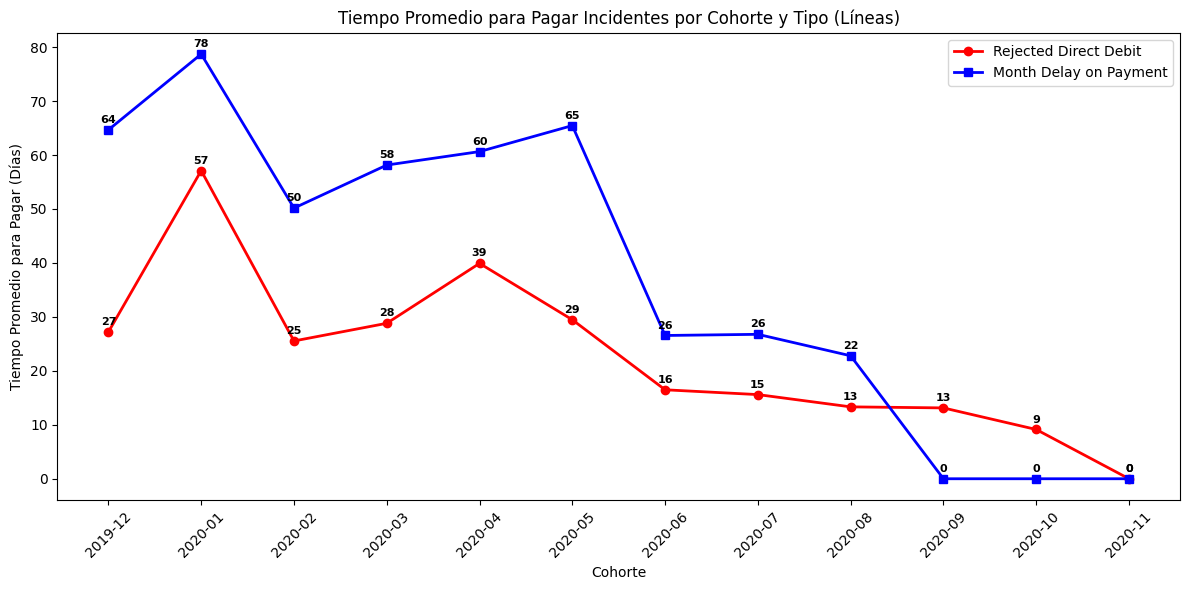

cohort_month               category  tiempo_promedio_dias  usuarios_unicos
     2019-12 month_delay_on_payment             64.666667                6
     2020-01 month_delay_on_payment             78.714286                7
     2020-02 month_delay_on_payment             50.166667                6
     2020-03 month_delay_on_payment             58.142857                7
     2020-04 month_delay_on_payment             60.638889               25
     2020-05 month_delay_on_payment             65.458333               36
     2020-06 month_delay_on_payment             26.554878               85
     2020-07 month_delay_on_payment             26.770588               53
     2020-08 month_delay_on_payment             22.791667               11
     2020-09 month_delay_on_payment              0.000000                0
     2020-10 month_delay_on_payment              0.000000                0
     2020-11 month_delay_on_payment              0.000000                0
     2019-12  rejected_di

In [19]:
# ================================================================================
# BONUS PARA MÉTRICA 2: Tiempo Promedio para Pagar Incidentes por Cohorte y Tipo
# ================================================================================
# Este script calcula el tiempo promedio para pagar incidentes (por categoría) agrupado por cohortes de usuarios.
# Se enfoca en categorías específicas: 'rejected_direct_debit' y 'month_delay_on_payment'.
# Las cohortes se definen por la primera solicitud de cash request de cada usuario (mes de created_at).
# Incluye visualización en gráfico de líneas con anotaciones y una tabla impresa con los resultados.
# Datos fuente: 
# - df_fees: Registros de fees (incidentes, pagos instantáneos, postergaciones) con columnas como type, category, created_at, paid_at.
# - df_cash: Solicitudes de cash requests con user_id y created_at para definir cohortes.
# Nota: Solo considera incidentes pagados (paid_at no nulo) y filtra cohortes de junio a noviembre 2020.


# PREPARAR DATOS DE CASH REQUESTS
# Preparamos las cohortes basadas en la primera solicitud por usuario.
# Esto define el 'cohort_month' como el mes de la primera interacción de cada user_id, usando created_at.

# Paso 1: Calcular la primera solicitud por usuario: Agrupar por user_id, tomar fecha mínima de created_at
first_requests = df_cash.groupby('user_id')['created_at'].min().reset_index()

# Paso 2: Convertir la fecha mínima a período mensual para definir el cohorte (e.g., '2020-06')
first_requests['cohort_month'] = first_requests['created_at'].dt.to_period('M')

# PREPARAR DATOS DE FEES
# Identificamos incidentes (type == 'incident').
# Los incidentes representan cargos por problemas como rechazos de débito o retrasos en pagos.

# Paso 1: Filtrar solo incidentes: Seleccionar rows donde type == 'incident' (2196 filas en el dataset)
df_incidents = df_fees[df_fees['type'] == 'incident'].copy()

# ENLAZAR INCIDENTES CON USER_ID Y COHORTE
# Unimos los datos de incidentes con cash requests para obtener user_id (usando cash_request_id == id de cash)
# y luego con las cohortes para agregar cohort_month por user_id.
# Esto permite analizar el comportamiento por grupo de usuarios que se unieron en el mismo mes.

# Paso 1: Merge para enlazar user_id: Unir df_incidents con df_cash usando cash_request_id == id
df_incidents = df_incidents.merge(df_cash[['id', 'user_id']], left_on='cash_request_id', right_on='id', how='left')

# Paso 2: Merge para agregar cohorte: Unir por user_id con first_requests para obtener cohort_month
df_incidents = df_incidents.merge(first_requests[['user_id', 'cohort_month']], on='user_id', how='left')

# Paso 3: Eliminar filas sin cohorte válida (e.g., user_id no encontrado o nulo)
df_incidents = df_incidents.dropna(subset=['cohort_month'])  # Asegura integridad de datos

# CALCULAR TIEMPO PARA PAGAR
# Calculamos la diferencia en días entre created_at (creación del incidente) y paid_at (pago).
# Solo considera incidentes pagados (paid_at no nulo), excluyendo rechazos o pendientes.

# Paso 1: Calcular la diferencia en días: Resta de datetime para obtener timedelta.days
df_incidents['tiempo_pago_dias'] = (df_incidents['paid_at'] - df_incidents['created_at']).dt.days

# Paso 2: Excluir incidentes no pagados: Eliminar rows donde tiempo_pago_dias es NaN
df_incidents = df_incidents.dropna(subset=['tiempo_pago_dias'])  # Filtra solo incidentes resueltos con pago

# AGRUPAR POR COHORTE Y CATEGORÍA
# Agregamos el tiempo promedio (mean) y usuarios únicos (nunique en user_id) por cohorte y categoría.
# Filtramos solo categorías de interés: 'rejected_direct_debit' y 'month_delay_on_payment'.

# Paso 1: Groupby múltiple por cohort_month y category, con agg mean en tiempo_pago_dias y nunique en user_id
desglose = df_incidents.groupby(['cohort_month', 'category'])['tiempo_pago_dias'].agg(['mean', 'nunique']).reset_index()

# Paso 2: Renombrar columnas para claridad: 'mean' -> 'tiempo_promedio_dias', 'nunique' -> 'usuarios_unicos'
desglose.columns = ['cohort_month', 'category', 'tiempo_promedio_dias', 'usuarios_unicos']

# Paso 3: Filtrar solo categorías relevantes: Mantener solo 'rejected_direct_debit' y 'month_delay_on_payment'
desglose = desglose[desglose['category'].isin(['rejected_direct_debit', 'month_delay_on_payment'])]

# RELLENAR COHORTES FALTANTES
# Creamos un producto cartesiano (todas combinaciones) para cohortes de Jun-2020 a Nov-2020 y las dos categorías.
# Rellenamos con 0 donde no hay datos, para un gráfico completo sin gaps; luego concat y agg para combinar.

# Paso 1: Generar lista de cohortes objetivo: De '2020-06' a '2020-11' usando pd.period_range, convertida a str
cohortes_list = pd.period_range('2020-06', '2020-11', freq='M').astype(str)

# Paso 2: Definir lista de categorías fijas para el producto cartesiano
categorias = ['rejected_direct_debit', 'month_delay_on_payment']

# Paso 3: Crear DataFrame cartesiano con valores por defecto (0 para avg y usuarios)
cohortes_completas = pd.DataFrame([
    {'cohort_month': coh, 'category': cat, 'tiempo_promedio_dias': 0, 'usuarios_unicos': 0}
    for coh in cohortes_list for cat in categorias
])

# Paso 4: Convertir cohort_month en desglose a str para matching con cohortes_completas
desglose['cohort_month'] = desglose['cohort_month'].astype(str)

# Paso 5: Concatenar datos reales con el DataFrame completo y aplicar groupby-agg para merge
desglose = pd.concat([desglose, cohortes_completas], ignore_index=True).groupby(['cohort_month', 'category']).agg({
    'tiempo_promedio_dias': 'mean',  # Promedio se mantiene o queda 0 si no hay datos
    'usuarios_unicos': 'sum'  # Suma usuarios (0 si no hay)
}).reset_index()

# PREPARAR DATOS PARA VISUALIZACIÓN
# Convertimos cohort_month a datetime temporal para ordenar cronológicamente por categoría y cohorte.
# Luego formateamos de vuelta a str '%Y-%m' para etiquetas en el gráfico.

# Paso 1: Convertir cohort_month a datetime agregando '-01' para parseo temporal
desglose['cohort_month'] = pd.to_datetime(desglose['cohort_month'] + '-01')

# Paso 2: Ordenar el DataFrame por category y cohort_month (cronológico)
desglose = desglose.sort_values(['category', 'cohort_month']).reset_index(drop=True)  # drop=True para limpiar index

# Paso 3: Formatear de vuelta cohort_month a string '%Y-%m' para etiquetas en el plot
desglose['cohort_month'] = desglose['cohort_month'].dt.strftime('%Y-%m')

# GENERAR GRÁFICA DE LÍNEAS
# Creamos un gráfico de líneas dual: Una por categoría, con marcadores y linewidth para visibilidad.
# Anotamos valores enteros (int) en cada punto para precisión; rotamos labels x para legibilidad.

# Paso 1: Crear figura y eje con tamaño fijo para claridad
fig, ax = plt.subplots(figsize=(12, 6))

# Paso 2: Filtrar y plotear línea para 'rejected_direct_debit' con marker='o' y color rojo
rejected = desglose[desglose['category'] == 'rejected_direct_debit']
ax.plot(rejected['cohort_month'], rejected['tiempo_promedio_dias'], marker='o', linewidth=2, label='Rejected Direct Debit', color='red')

# Paso 3: Filtrar y plotear línea para 'month_delay_on_payment' con marker='s' y color azul
delay = desglose[desglose['category'] == 'month_delay_on_payment']
ax.plot(delay['cohort_month'], delay['tiempo_promedio_dias'], marker='s', linewidth=2, label='Month Delay on Payment', color='blue')

# Paso 4: Añadir anotaciones con valores enteros: Iterar rows y annotate en cada punto
for i, row in desglose.iterrows():
    ax.annotate(f'{int(row["tiempo_promedio_dias"])}', (row['cohort_month'], row['tiempo_promedio_dias']), xytext=(0, 5), textcoords='offset points', 
                ha='center', fontsize=8, fontweight='bold')  # Centrado, negrita, pequeño

# Paso 5: Configurar ejes, título, leyenda y rotación de labels x
ax.set_xlabel('Cohorte')  # Eje x: Meses de cohorte
ax.set_ylabel('Tiempo Promedio para Pagar (Días)')  # Eje y: Días promedio
ax.set_title('Tiempo Promedio para Pagar Incidentes por Cohorte y Tipo (Líneas)')
ax.legend()  # Muestra leyenda con labels de líneas
ax.tick_params(axis='x', rotation=45)  # Rota labels x para evitar overlap

# Paso 6: Ajustar layout y mostrar el gráfico
plt.tight_layout()  # Ajusta layout para fit
plt.show()

# IMPRIMIR TABLA DE RESULTADOS
# Mostramos la tabla con cohort_month, category, tiempo_promedio_dias y usuarios_unicos.
# Usa to_string(index=False) para tabla limpia sin índice.

# Paso 1: Imprimir la tabla formateada en consola, seleccionando columnas clave
print(desglose[['cohort_month', 'category', 'tiempo_promedio_dias', 'usuarios_unicos']].to_string(index=False))

Explicación  
> Cálculo: Para cada usuario con un incidente, se resta paid_at (fecha de pago) menos created_at (fecha de creación del incidente) = días tardados.  
Promedio: Se promedia por cohorte y tipo de incidente (solo usuarios únicos, no repetidos).  
Ejemplo: Para 2019-12 con "month_delay_on_payment": 64.67 días significa que, en promedio, esos usuarios tardaron ~65 días en pagar el delay acumulado desde que se registró el incidente.

## MÉTRICA 3:  
> CÁLCULO DEL REVENUE - GANANCIAS GENERADAS POR COHORTE Y USUARIOS  
> GRÁFICA

C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1711854720.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_cohort = df_cash.groupby('user_id')['created_at'].min().dt.to_period('M').reset_index()
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1711854720.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged['revenue_month'] = df_merged['paid_at'].dt.to_period('M')
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1711854720.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=1)
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1711854720.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), rotati

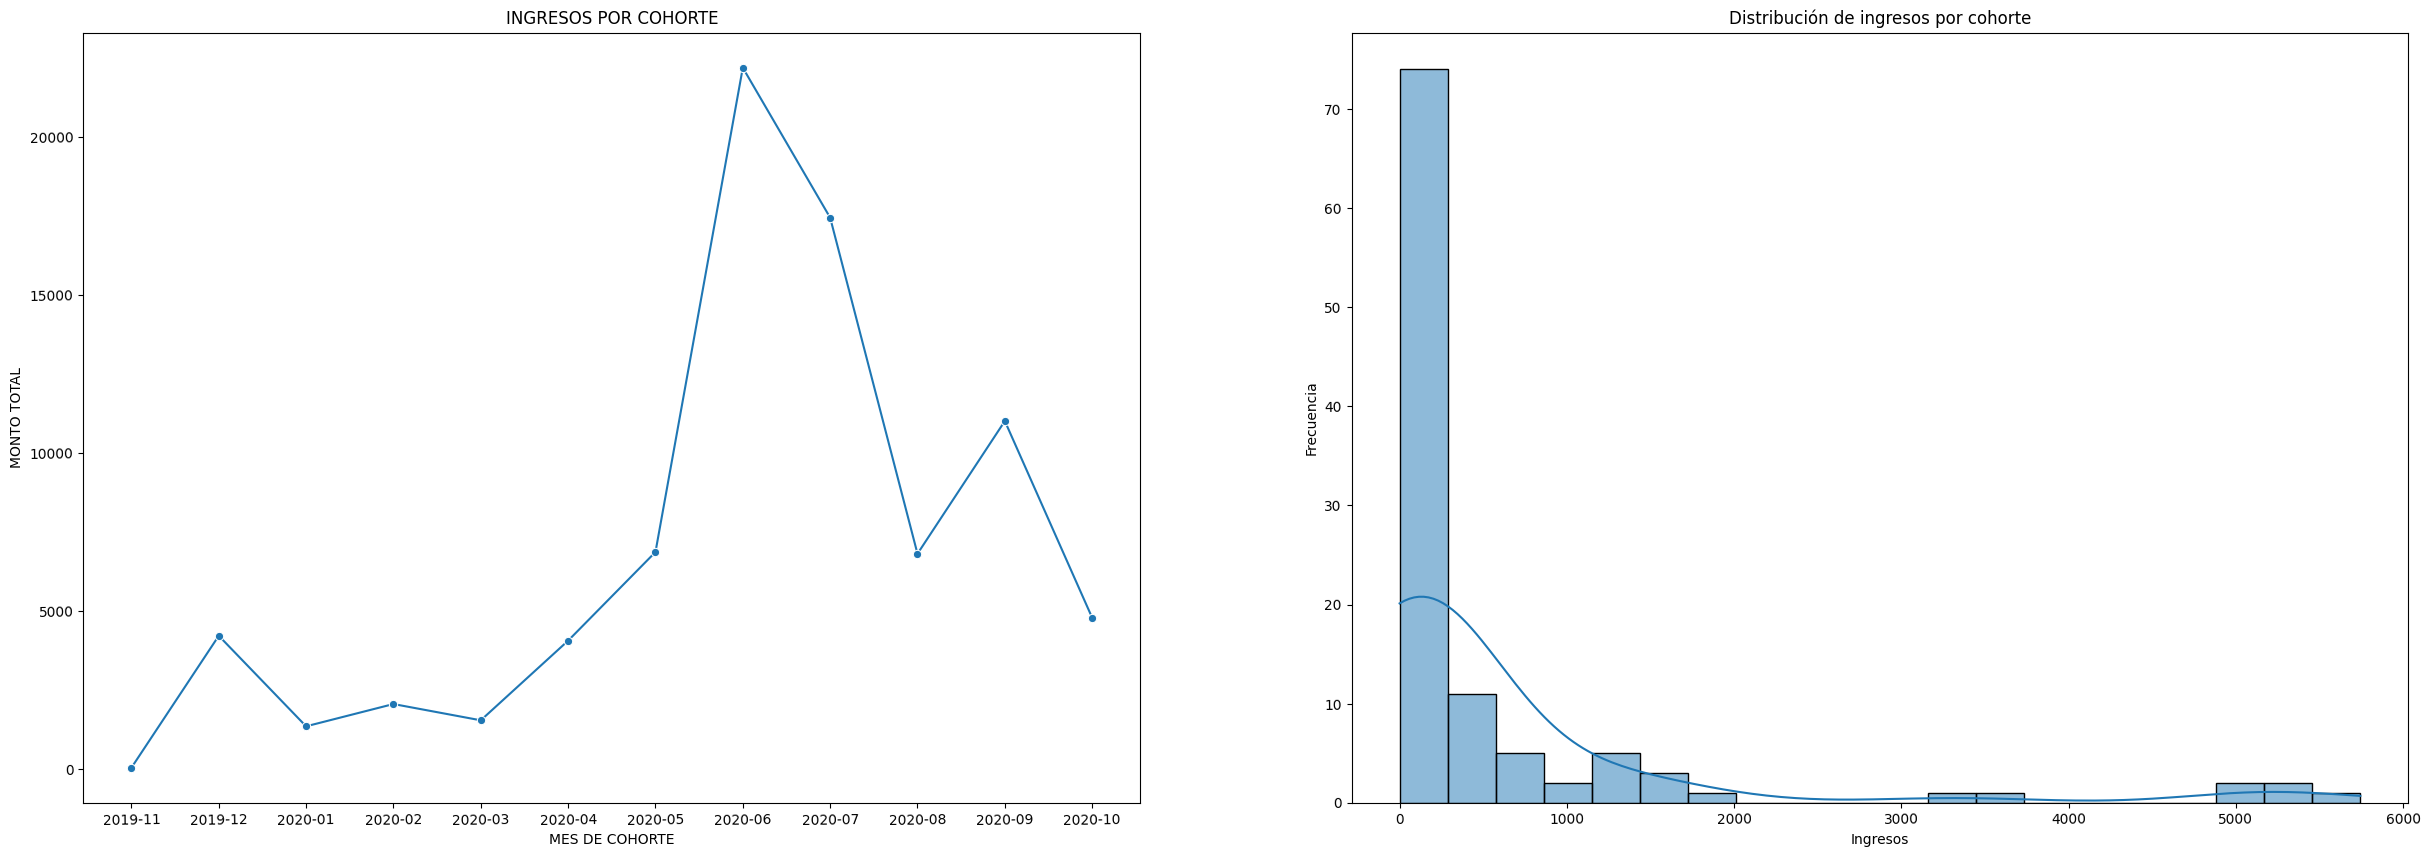

C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1711854720.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


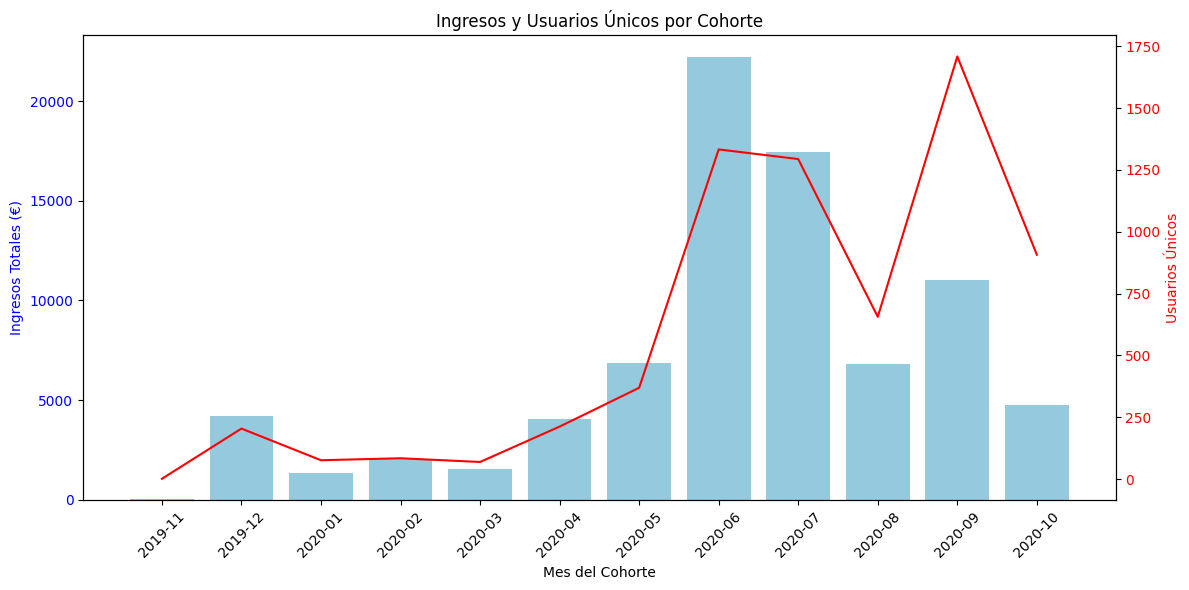

In [20]:
# ====================================================================================
# MÉTRICA 3: Realizamos un análisis de las ganancias generadas por cohorte y usuarios.
# ====================================================================================

# CREAMOS LA PRIMERA TRANSACCION DEL USUARIO

# Paso 1: Agrupamos por usuarios únicos y obtenemos la fecha mínima de creación (cohorte)
user_cohort = df_cash.groupby('user_id')['created_at'].min().dt.to_period('M').reset_index()

# Paso 2: Renombramos las columnas para claridad
user_cohort.columns = ['user_id', 'cohort_month']

# ASOCIAMOS LOS INGRESOS CON LOS USUARIOS

# Paso 1: Realizamos un merge entre df_fees y df_cash para asociar user_id
df_merged = df_fees.merge(df_cash[['id', 'user_id']], on='id', how='left')

# Paso 2: Reordenamos las columnas para posicionar 'user_id' en el índice 2
cols = list(df_merged.columns)
cols.insert(2, cols.pop(cols.index('user_id')))
df_merged = df_merged[cols]

# AÑADIMOS EL MES DE CADA PAGO Y COHORTE DEL USUARIO

# Paso 1: Creamos la columna 'revenue_month' a partir de 'paid_at' en formato período mensual
df_merged['revenue_month'] = df_merged['paid_at'].dt.to_period('M')

# Paso 2: Mergeamos con user_cohort para agregar la información de cohorte
df_merged = df_merged.merge(user_cohort, on='user_id', how='left')

# Paso 3: Reordenamos las columnas para posicionar 'revenue_month' en el índice 3
cols2 = list(df_merged.columns)
cols2.insert(3, cols2.pop(cols2.index('revenue_month')))
df_merged = df_merged[cols2]

# CALCULAMOS LAS GANANCIAS POR COHORTE Y MES

# Paso 1: Calculamos el revenue total por cohorte mensual
cohort_revenue = df_merged.groupby(['cohort_month'])['total_amount'].sum().reset_index()

# Paso 2: Calculamos el revenue total por cohorte y mes de revenue
cohort_revenue2 = df_merged.groupby(['cohort_month', 'revenue_month'])['total_amount'].sum().reset_index()

# MOSTRAMOS EN UN GRAFICO

# Creamos una tabla pivote para los datos de revenue por cohorte y mes
cohort_pivot = cohort_revenue2.pivot_table(
    index='revenue_month', 
    columns='cohort_month', 
    values='total_amount', 
    aggfunc='sum'
).fillna(0)

# Creamos una figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Convertimos cohort_month a string para compatibilidad con lineplot
cohort_revenue['cohort_month'] = cohort_revenue['cohort_month'].astype(str)

# Gráfico 1: Línea de ingresos totales por cohorte
sns.lineplot(data=cohort_revenue, x='cohort_month', y='total_amount', marker='o', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=1)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=1)
axes[0].set_title("INGRESOS POR COHORTE")
axes[0].set_ylabel("MONTO TOTAL")
axes[0].set_xlabel("MES DE COHORTE")

# Gráfico 2: Histograma de la distribución de ingresos por cohorte
values = cohort_pivot.values.flatten()
sns.histplot(values, bins=20, kde=True, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=1)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=1)
axes[1].set_title("Distribución de ingresos por cohorte")
axes[1].set_xlabel("Ingresos")
axes[1].set_ylabel("Frecuencia")

plt.show()

# GRÁFICA DE LAS GANANCIAS POR COHORTE Y USUARIO

# Agrupamos por cohorte para calcular revenue total y número de usuarios únicos
cohort_user = df_merged.groupby(['cohort_month']).agg({
    'total_amount': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Creamos una figura para el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra de ingresos totales por cohorte
sns.barplot(data=cohort_user, x='cohort_month', y='total_amount', color="skyblue", ax=ax1)
ax1.set_ylabel("Ingresos Totales (€)", color="blue")
ax1.set_xlabel("Mes del Cohorte")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Eje secundario para la línea de usuarios únicos
ax2 = ax1.twinx()

# Convertimos cohort_month a string para compatibilidad con lineplot
cohort_user['cohort_month'] = cohort_user['cohort_month'].astype(str)

# Línea de usuarios únicos por cohorte
sns.lineplot(data=cohort_user, x='cohort_month', y='user_id', color="red", markers="o", ax=ax2)
ax2.set_ylabel("Usuarios Únicos", color="red")
ax2.tick_params(axis='y', labelcolor='red')

# Título general y ajustes finales
plt.title("Ingresos y Usuarios Únicos por Cohorte")
plt.tight_layout()
plt.show()


C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1880590894.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_cohort = df_cash.groupby('user_id')['created_at'].min().dt.to_period('M').reset_index() #agrupamos por usuarios unicos y fechas
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1880590894.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged['revenue_month'] = df_merged['paid_at'].dt.to_period('M')#Convierto la linea revenue_month a un data time set
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1880590894.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation= 1)
C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1880590894.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set



   cohort_month revenue_month  total_amount
20      2020-02       2020-06         200.0
2       2019-12       2020-06         210.0
11      2020-01       2020-06         125.0
29      2020-03       2020-06          50.0
54      2020-06       2020-07          80.0
..          ...           ...           ...
10      2019-12       2021-02          15.0
53      2020-05       2021-02          30.0
45      2020-04       2021-02          10.0
28      2020-02       2021-02          10.0
82      2020-10       2021-02          65.0

[83 rows x 3 columns]


C:\Users\angel\AppData\Local\Temp\ipykernel_12092\1880590894.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45)


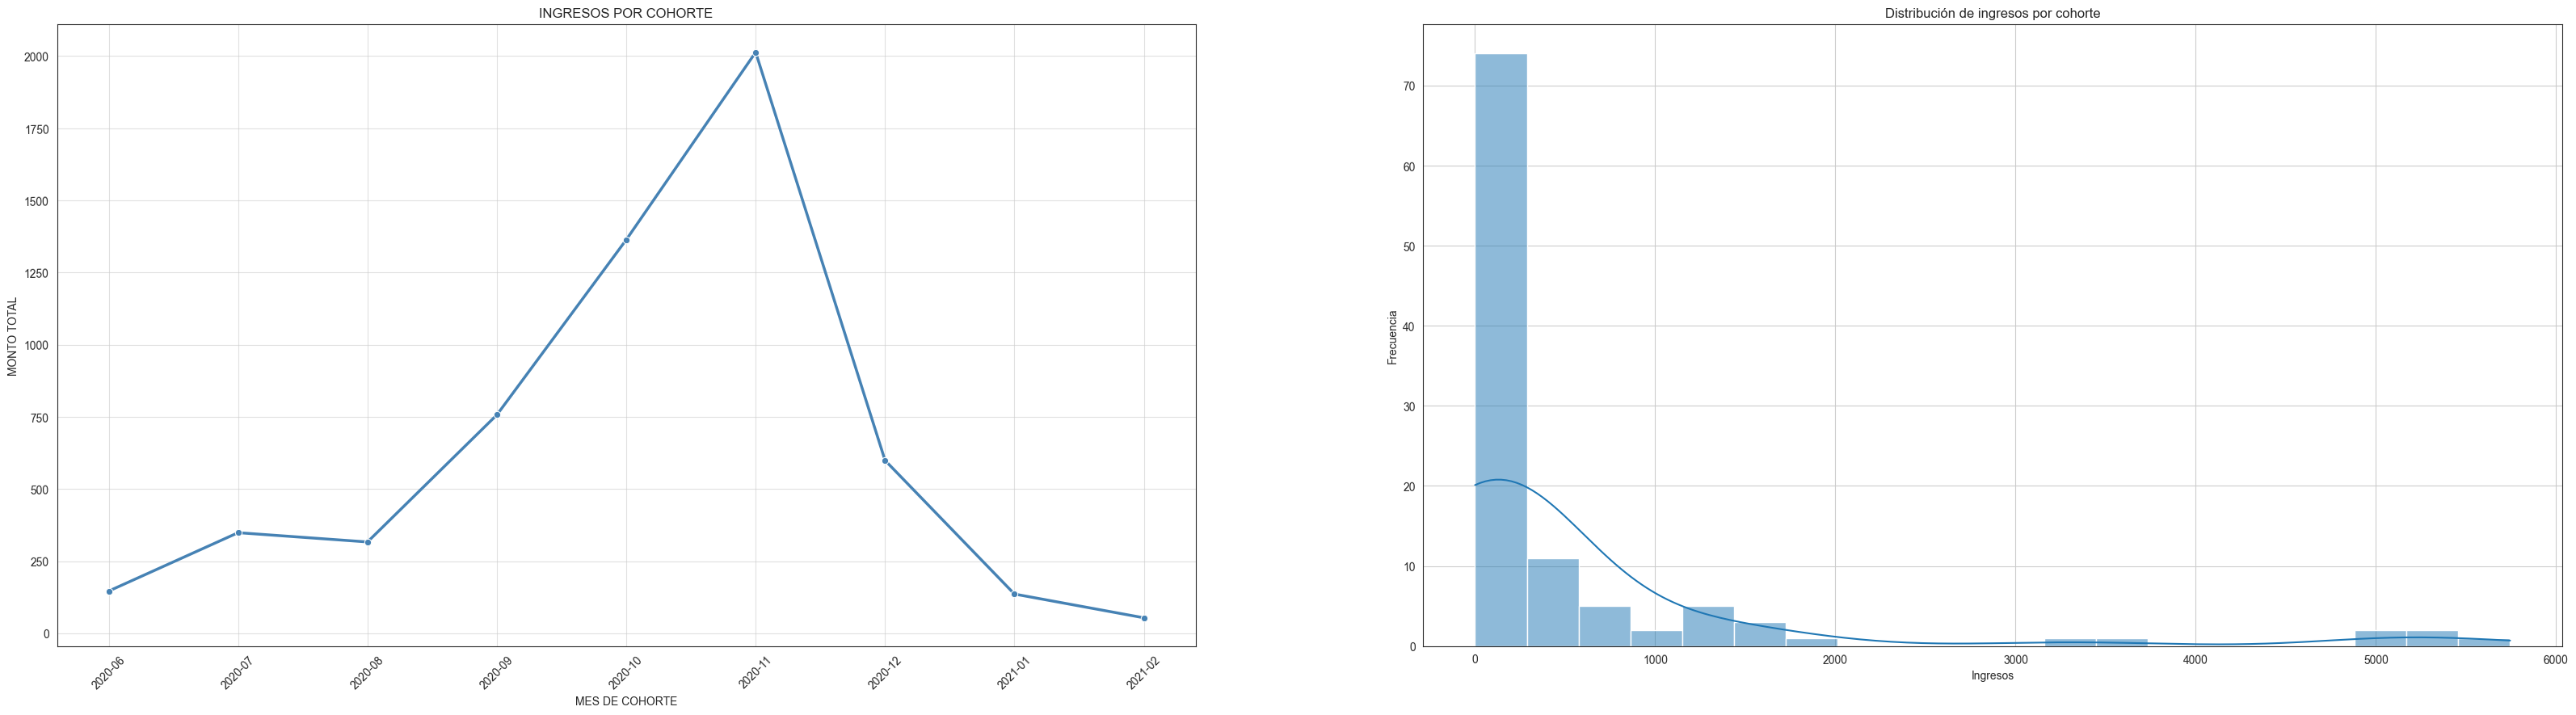

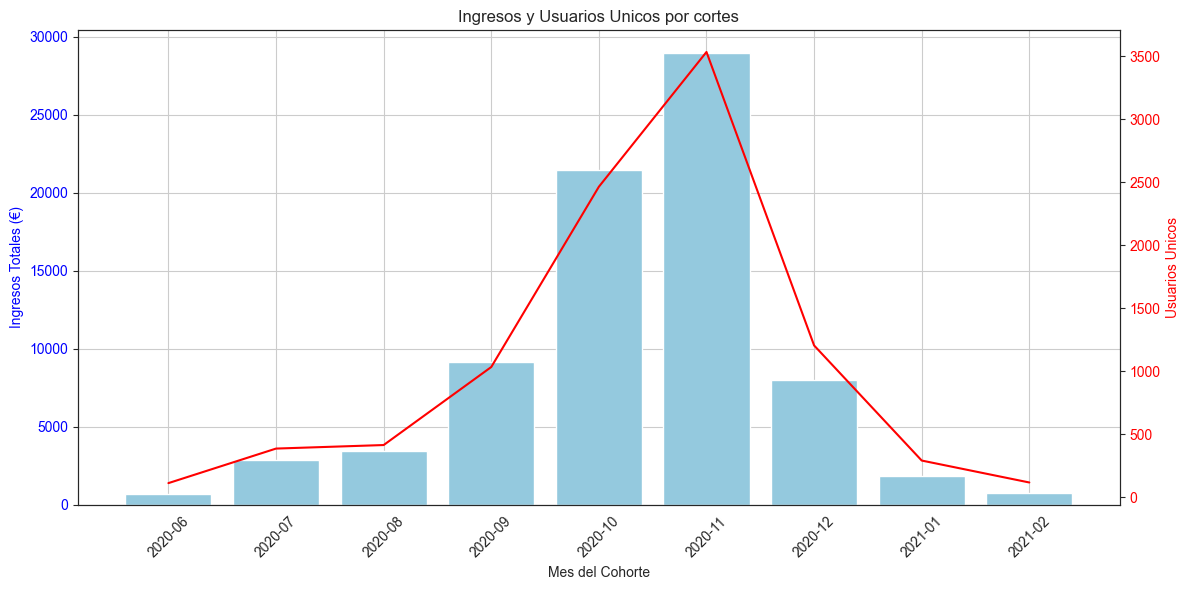



  revenue_month  total_amount  user_id
0       2020-06         695.0      112
1       2020-07        2895.0      386
2       2020-08        3430.0      414
3       2020-09        9180.0     1033
4       2020-10       21465.0     2463
5       2020-11       28965.0     3532
6       2020-12        8005.0     1204
7       2021-01        1825.0      291
8       2021-02         730.0      117


In [24]:
"""GENERAREMOS UN ANALISIS DE LAS GANANCIAS GENERADAS"""


""" CREAMOS LA PRIMERA TRANSACCION DEL USUARIO"""

df_cash['created_at'] = pd.to_datetime(df_cash['created_at'], errors = 'coerce') #transformamos las fechas a un formato de fecha y el coerce es para que los nulos tenga formato de fecha nulo
user_cohort = df_cash.groupby('user_id')['created_at'].min().dt.to_period('M').reset_index() #agrupamos por usuarios unicos y fechas
user_cohort.columns = ['user_id', 'cohort_month'] # elegimos el nombre de las columnas


"""ASOCIAMOS LOS INGRESOS CON LOS USUARIOS"""

df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], errors = 'coerce') #transformamos las fechas a un formato de fecha y el coerce es para que los nulos tenga formato de fecha nulo
df_merged = df_fees.merge(df_cash[['id','user_id']], on='id', how='left') # hacemos merge

cols = list(df_merged.columns) #creo variable para asignar columnas
cols.insert(2,cols.pop(cols.index('user_id'))) #cambio de posicion la columna
df_merged = df_merged[cols] # Llamar a merged con las columnas cambiadas


""""AÑADIMOS EL MES DE CADA PAGO Y COHORTE DEL USUARIO"""

df_merged['revenue_month'] = df_merged['paid_at'].dt.to_period('M')#Convierto la linea revenue_month a un data time set
df_merged= df_merged.merge(user_cohort, on='user_id', how='left') #Hago un merge con el grup by que habia creado anteriormente.

cols2 = list(df_merged.columns) #creo variable para asignar columnas
cols2.insert(3,cols2.pop(cols2.index('revenue_month'))) #cambio de posicion la columna
df_merged = df_merged[cols2] # Llamar a merged con las columnas cambiadas


"""CALCULAMOS LAS GANANCIAS POR COHORTE Y MES"""

cohort_revenue= (df_merged.groupby(['cohort_month'])['total_amount'].sum().reset_index()) #Variable que nos va a albergar las 
cohort_revenue2= (df_merged.groupby(['cohort_month','revenue_month'])['total_amount'].sum().reset_index()) #Variable que nos va a albergar las 


"""MOSTRAMOS EN UN GRAFICOS"""


cohort_pivot = cohort_revenue2.pivot_table( index= 'revenue_month', columns='cohort_month',values='total_amount', aggfunc='sum').fillna(0)


sns.set_style("white")
fig, axes = plt.subplots(1,2, figsize=(40,10)) #CREAMOS DOS GRAFICOS EN UNA LINEA


cohort_revenue2['revenue_month'] = cohort_revenue2['revenue_month'].astype(str) #PARA PODER USAR EL LINEPLOT DEBE ENTENDER EL MES DEL COHORTE COMO STR POR QUE SINO NO TOMA LOS VALORES CORRECTOS"""
cohort_revenue2 = cohort_revenue2.sort_values('revenue_month')#ORDENAMOS LAS FECHAS

sns.lineplot(data=cohort_revenue2, x='revenue_month', y='total_amount',  marker='o', color="steelblue", linewidth=2.5,errorbar=None, ax=axes[0])
axes[0].grid(True, linestyle = "-", alpha=0.6, linewidth=0.8)
axes[0].margins(x=0.05)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation= 1)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation= 1)
axes[0].set_title("INGRESOS POR COHORTE")
axes[0].set_ylabel("MONTO TOTAL")
axes[0].set_xlabel("MES DE COHORTE")
axes[0].tick_params(axis='x', rotation=45)
axes[0].margins(x=0.05)

values = cohort_pivot.values.flatten()
sns.histplot(values, bins=20, kde=True, ax = axes[1])
axes[1].grid(True, linestyle = "-", alpha = 1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation= 1)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation= 1)
axes[1].set_title("Distribución de ingresos por cohorte")
axes[1].set_xlabel("Ingresos")
axes[1].set_ylabel("Frecuencia")

print("\n")
print(cohort_revenue2)


"""CALCULAMOS LAS GANANCIAS POR COHORTE Y USUARIO"""

cohort_user= (df_merged.groupby(['revenue_month']).agg({'total_amount':sum,'user_id':'nunique'}).reset_index())


fig, ax1 = plt.subplots(figsize= (12,6))


#BARRA DE INGRESOS
sns.barplot(data = cohort_user, x= 'revenue_month', y='total_amount', color="skyblue", ax=ax1) #DEFINO QUE REVENUE MONTH VA A SER EL COMUN DENOMINADOR EN MIS 2 TABLAS
ax1.grid(True, linestyle = "-", alpha = 1)
ax1.set_ylabel("Ingresos Totales (€)", color="blue")
ax1.set_xlabel("Mes del Cohorte")
ax1.tick_params(axis='y', labelcolor='blue')#LE INDICO QUE MI LADO IZQUIERDO DEBE SER DE UN COLOR 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45)


#LINEA DE USUARIOS
ax2= ax1.twinx()#AGREGAME UNA COLUMNA DEL LADO DERECHO PARA MOSTRAR MAS DATOS SOBRE EL GRAFICO
cohort_user['revenue_month'] = cohort_user['revenue_month'].astype(str)#PARA PODER USAR EL LINEPLOT DEBE ENTENDER EL MES DEL COHORTE COMO STR POR QUE SINO NO TOMA LOS VALORES CORRECTOS 
cohort_user = cohort_user.sort_values('revenue_month')
sns.lineplot(data=cohort_user, x= 'revenue_month', y="user_id", color="red", markers="o", ax=ax2)#DEFINO QUE COHORT MONTH VA A SER EL COMUN DENOMINADOR EN MIS 2 TABLAS
ax2.set_ylabel("Usuarios Unicos",color ="red")
ax2.tick_params(axis="y", labelcolor="red") #LE INDICO QUE MI LADO DERECHO DEBE SER DE UN COLOR 


plt.title("Ingresos y Usuarios Unicos por cortes") #TITULO UNIVERSAL DE LA TABLA
plt.tight_layout() #AJUSTAMOS ESPACIOS ENTRE LOS TITULOS/SUBGRAFICOS/ETIQUETAS/EJES
plt.show()# MOSTRAMOS


print("\n")
print(cohort_user)